# Bike Sharing Dataset ( day basis)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.metrics            import r2_score
from sklearn.metrics            import mean_squared_error
from sklearn.model_selection    import GridSearchCV


### Reading Data

In [2]:
day=pd.read_csv('day.csv')

In [3]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Droping irrelevent columns

In [4]:
day.drop(['instant','dteday','casual','mnth','registered'],axis=1,inplace=True)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [6]:
day.isna().sum()

season        0
yr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- Data have no null values
- Data is already normalized

#### Analzing more from data

In [7]:
day.describe()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


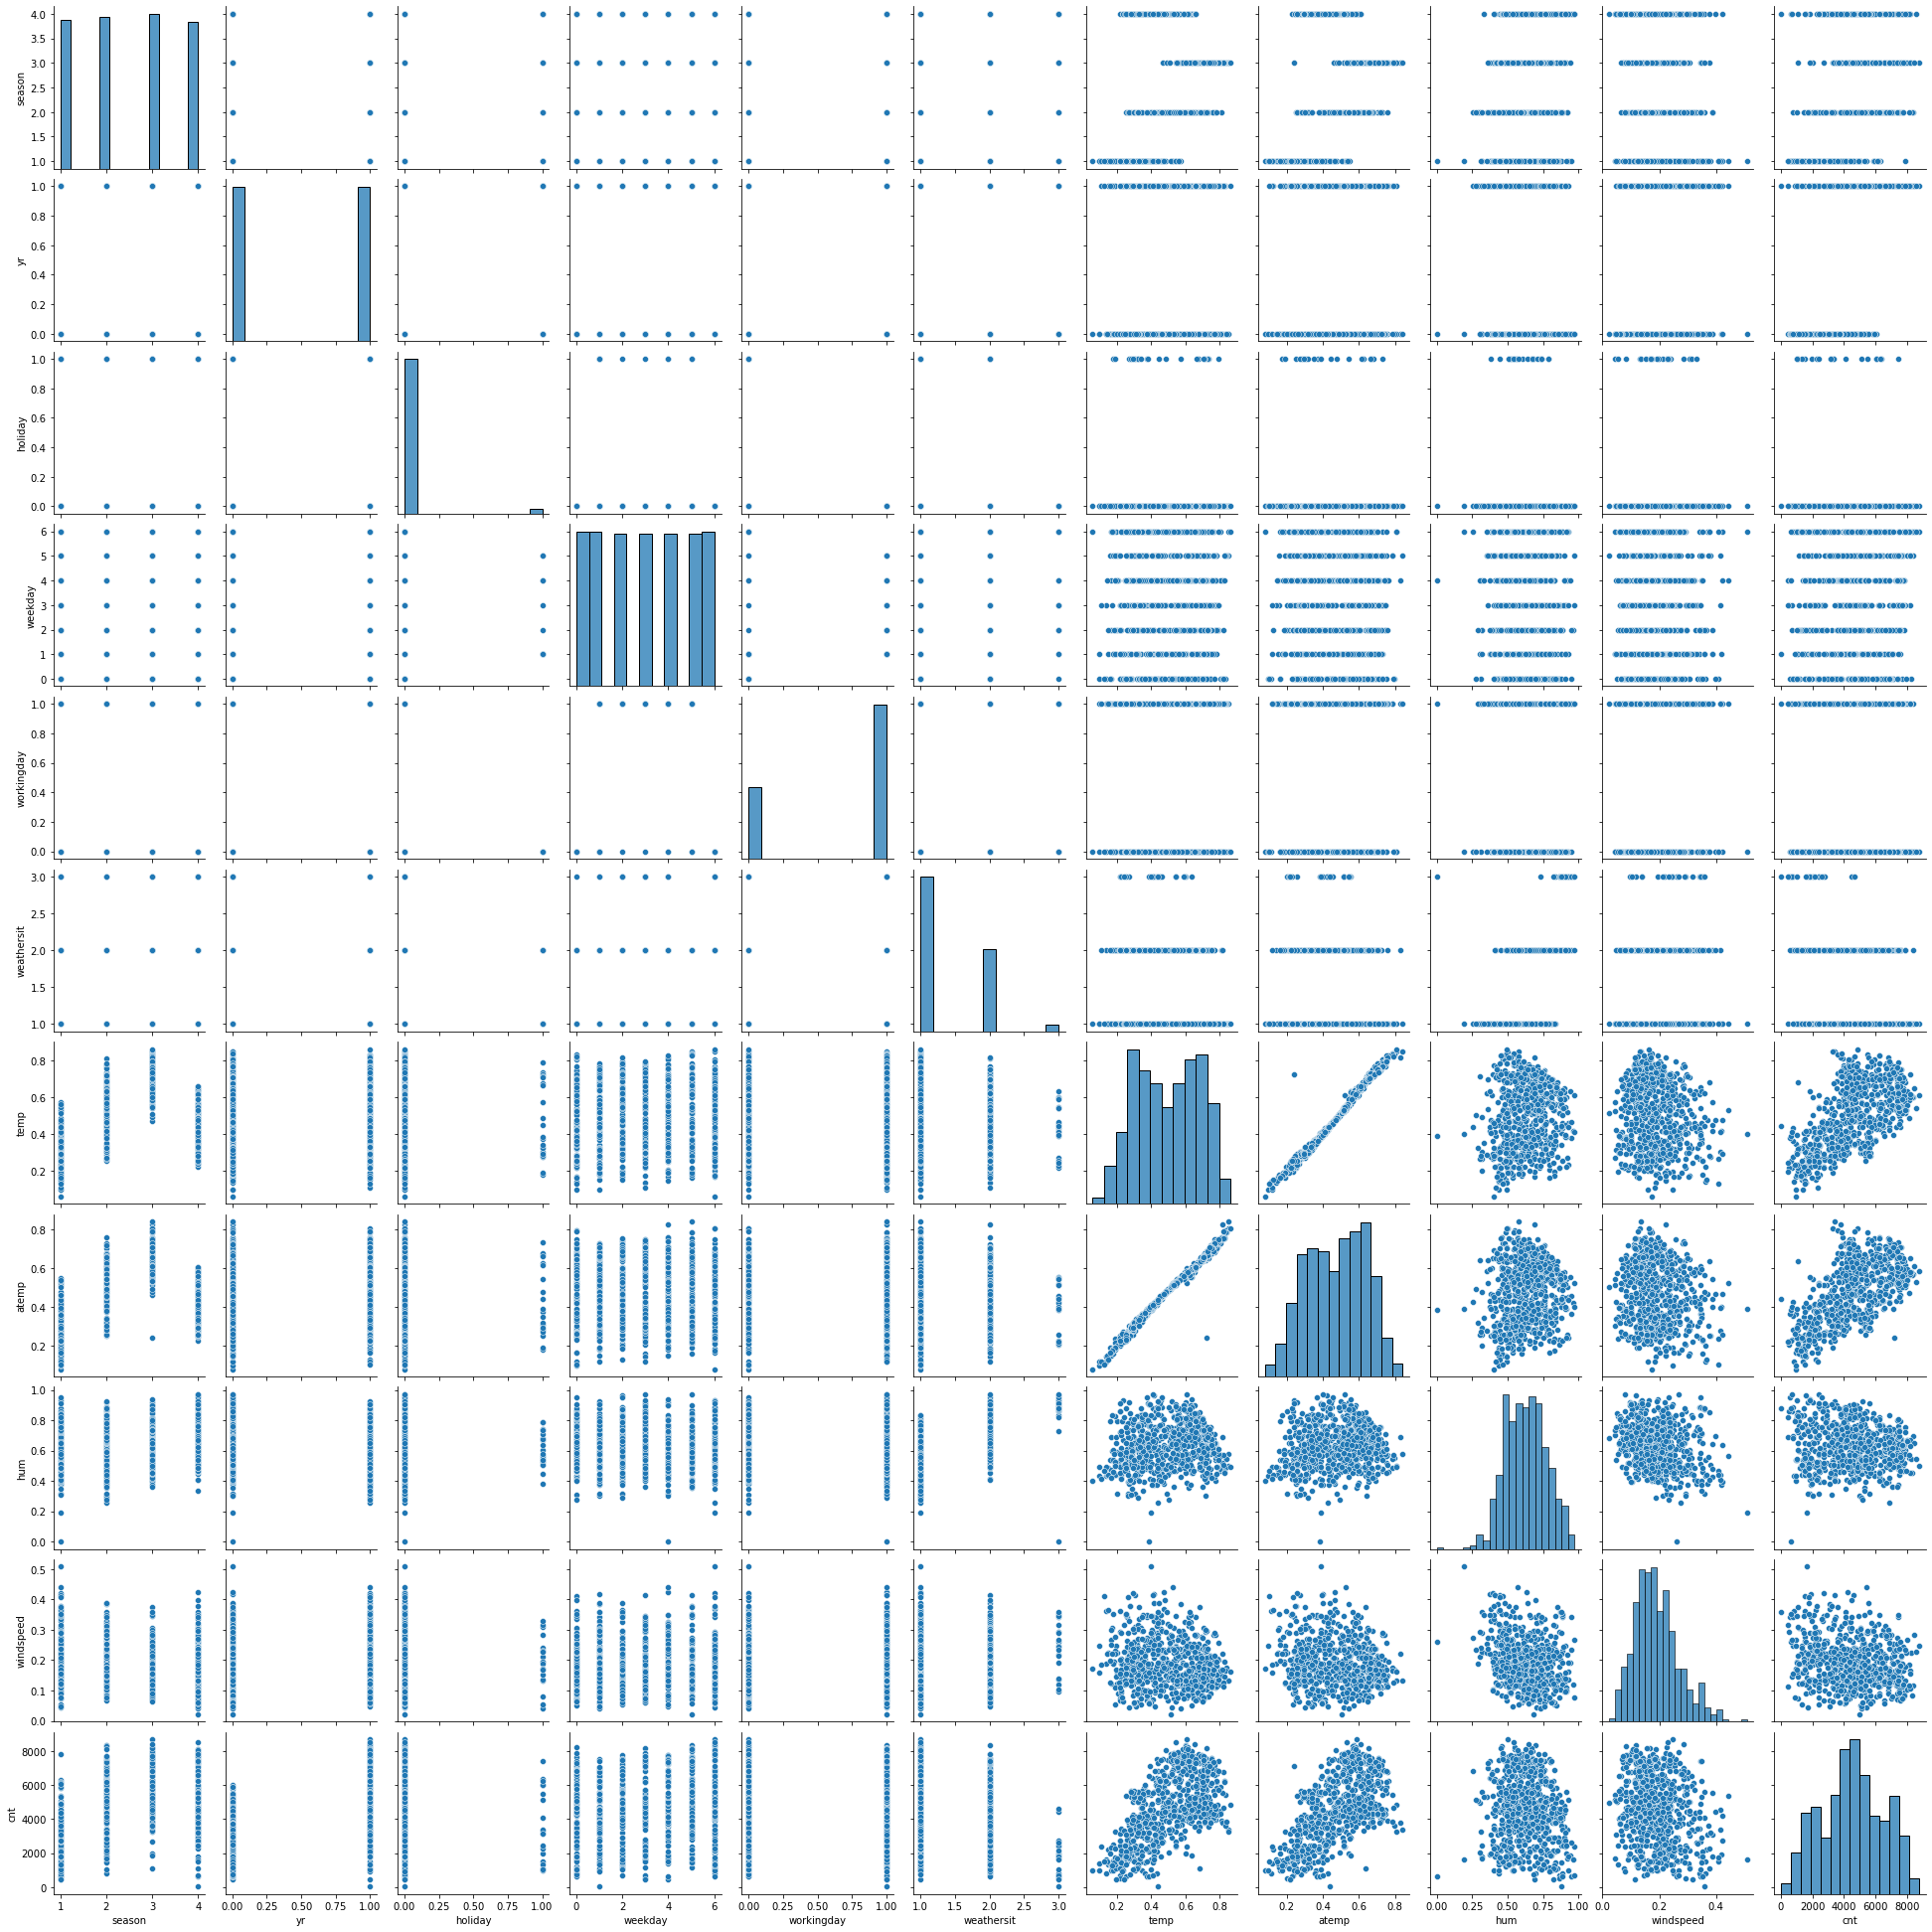

In [8]:
sns.pairplot(day)

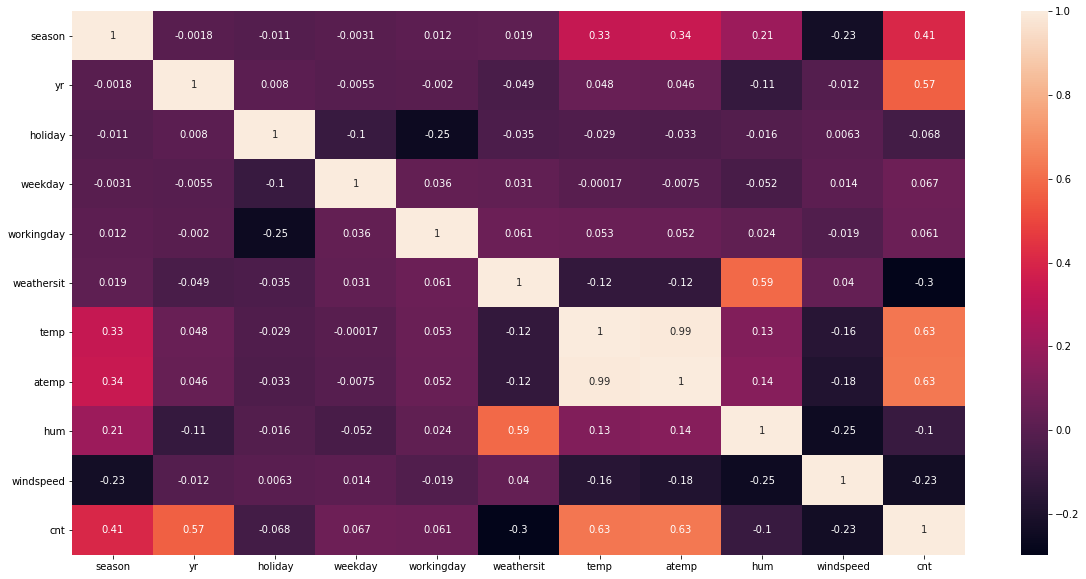

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=day.corr(),annot=True)
plt.show()

From above we can conclude that 
- temp and atemp is correlated to each other
- None of the column is Highly correlated with cnt so Linear Regression will not give good accuracy
- Rest, Data looks fine is ready for modeling

### Spliting the Train Test Data

In [10]:
X=day.drop(['cnt','atemp'],axis=1)
y=day['cnt']

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=100)

#### Creating Regressor and Grid Function

In [12]:
def Regressor(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Training Score :',model.score(X_train,y_train))
    print('Testing Score :',model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    print('MSE :',mean_squared_error(y_test, y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score :',r2_score(y_test, y_pred))
    plt.scatter(y_pred,y_test,alpha=0.5)
    


In [13]:
def Grid(model,X_train,y_train,X_test,y_test,para):
    model1=GridSearchCV(model, param_grid=para, n_jobs=-1,cv=5)
    Regressor(model1,X_train,X_test,y_train,y_test)
    print("Best Hyper Parameters:\n",model1.best_params_)

### Modeling

Using Decision Tree and RandomForest Regressor without and with Hyperparameter tuning and comparing them

#### Decision Tree Regressor

Training Score : 1.0
Testing Score : 0.7882498246302991
MSE : 721978.7346938775
RMSE : 849.6933180235546
R2 Score : 0.7882498246302991


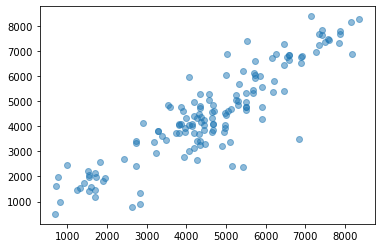

In [14]:
Dt_model=DecisionTreeRegressor()
Regressor(Dt_model,X_train,y_train,X_test,y_test)

#### Decision Tree Regressor with Hyperparamter tuning

Training Score : 0.8831403411968615
Testing Score : 0.769427919349715
MSE : 786153.4884350669
RMSE : 886.6529695631019
R2 Score : 0.769427919349715
Best Hyper Parameters:
 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 14, 'splitter': 'random'}


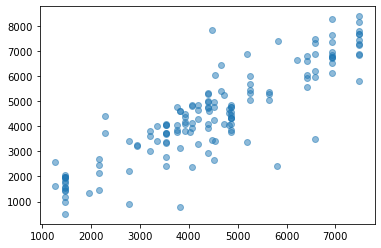

In [15]:
D_para = {
          'splitter':['best', 'random'],
          'max_depth': [4,5,6,7,8,9,10],
          'min_samples_split': [i for i in range(2,15,1)], 
          'min_samples_leaf':[i for i in range(2,15,1)]}
Grid(Dt_model,X_train,X_test,y_train,y_test,D_para)

#### RandomForest Regressor

Training Score : 0.9829030241658212
Testing Score : 0.8820137025995076
MSE : 402283.4812755102
RMSE : 634.2582134080017
R2 Score : 0.8820137025995076


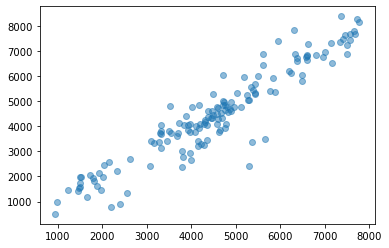

In [16]:
R_model= RandomForestRegressor()
Regressor(R_model,X_train,y_train,X_test,y_test)

#### RandomForest Regressor with hyperparameter tuning

Training Score : 0.9764139578839842
Testing Score : 0.8860365115664715
MSE : 388567.4004136505
RMSE : 623.3517469404017
R2 Score : 0.8860365115664715
Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 125, 'n_jobs': -1}


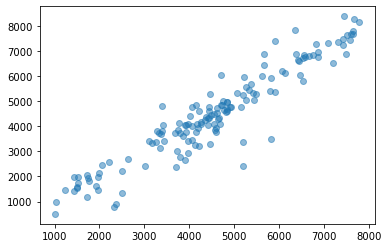

In [17]:
R_para = {
          'n_estimators':[25,50,75,100,125,150],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7],
         'n_jobs':[-1],
        }
Grid(R_model,X_train,X_test,y_train,y_test,R_para)

#### Finding Important features

In [20]:
final_model= RandomForestRegressor(min_samples_leaf= 1, min_samples_split= 4, n_estimators = 125, random_state=100,n_jobs= -1)
final_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=125, n_jobs=-1,
                      random_state=100)

<AxesSubplot:>

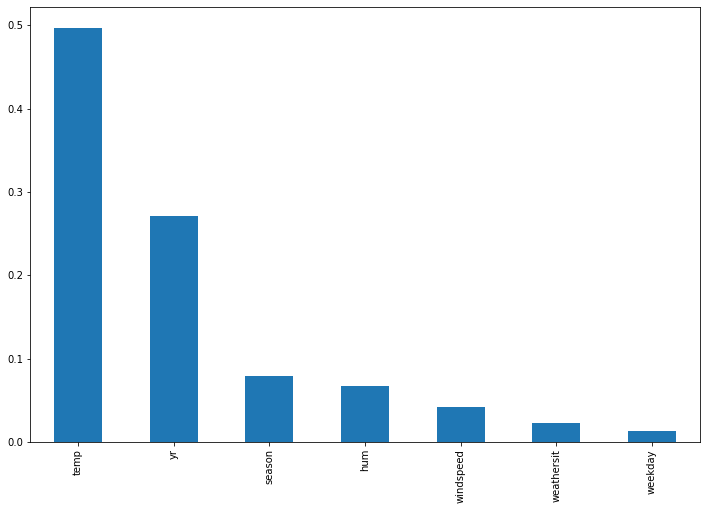

In [21]:
plt.figure(figsize=(12,8))
imp=pd.Series(final_model.feature_importances_,index=X.columns)
imp.nlargest(7).plot(kind='bar')

### Conclusion

By Comparing 4 models we come up with a best model which is RandomForest Regressor with
- MSE : 388567.4
- RMSE : 623.35
- R2 Score : 0.89
- Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 125, 'n_jobs': -1}
 - temp is most important feature followed by year, season, humidity